In [11]:
import pandas as pd
import FinancialInstrument as fi
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [18]:
eur_usd = fi.FinancialInstrument('EURUSD=X', '2000-01-01', '2021-11-19')

[*********************100%***********************]  1 of 1 completed


In [19]:
data = eur_usd.data
data

,price,log_returns
Date,,
2003-12-01,1.196501,NaN
2003-12-02,1.208897,0.010307
2003-12-03,1.212298,0.002809
2003-12-04,1.208094,-0.003473
2003-12-05,1.218695,0.008736
...,...,...
2021-11-15,1.144165,-0.000801
2021-11-16,1.136648,-0.006592
2021-11-17,1.132118,-0.003993


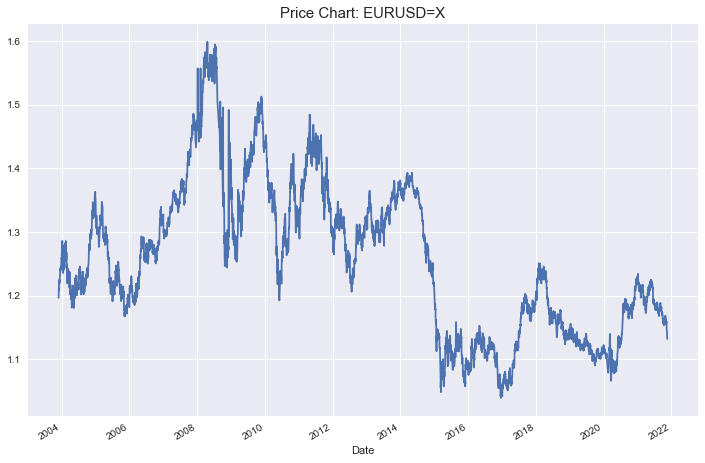

In [20]:
eur_usd.plot_prices()

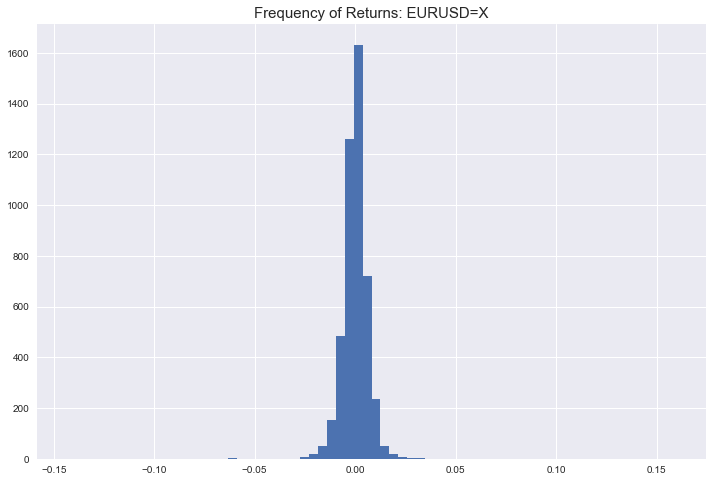

In [22]:
eur_usd.plot_returns(kind="hist")

### We will perform three types of strageties here<br>
- buy and hold 
- ema
- optimal ema

In [23]:
# buy and hold:
# returns:
data.log_returns.sum()

-0.05553777884905586

In [24]:
# use 1 eur to buy usd and the price worth now
np.exp(data.log_returns.sum())

0.9459762851000727

In [25]:
# to check the above
data.price[-1] / data.price[0]

0.9459762851000715

In [26]:
# to see how the 1 eur worth usd changes everyday
data['creturns'] = data.log_returns.cumsum().apply(np.exp)

In [27]:
data.head()

,price,log_returns,creturns
Date,,,
2003-12-01,1.196501,NaN,NaN
2003-12-02,1.208897,0.010307,1.010360
2003-12-03,1.212298,0.002809,1.013202
2003-12-04,1.208094,-0.003473,1.009689
2003-12-05,1.218695,0.008736,1.018549


In [30]:
data.dropna(inplace=True)

In [31]:
data

,price,log_returns,creturns
Date,,,
2003-12-02,1.208897,0.010307,1.010360
2003-12-03,1.212298,0.002809,1.013202
2003-12-04,1.208094,-0.003473,1.009689
2003-12-05,1.218695,0.008736,1.018549
2003-12-08,1.222001,0.002709,1.021312
...,...,...,...
2021-11-15,1.144165,-0.000801,0.956259
2021-11-16,1.136648,-0.006592,0.949976
2021-11-17,1.132118,-0.003993,0.946190


Note that the log returns shows the daily log changes of the price, whereas the creturns gives us an idea how the 1 dollar worth overtime

### Performance Metrices

In [34]:
overtime_money_worth = data.creturns.iloc[-1] # 1dollar worth now with this strategy
overtime_returns = data.log_returns.sum()  # overall returns
annualized_return = data.log_returns.mean() * 252
annualized_risk = data.log_returns.std() * np.sqrt(252)

In [35]:
overtime_money_worth

0.9459762851000723

In [36]:
overtime_returns

-0.05553777884905578

In [37]:
annualized_return

-0.0030033305300348

In [38]:
annualized_risk

0.11669427155644053

Maximum drawdown

In [39]:
data['cummax'] = data.creturns.cummax()

In [40]:
data

,price,log_returns,creturns,cummax
Date,,,,
2003-12-02,1.208897,0.010307,1.010360,1.010360
2003-12-03,1.212298,0.002809,1.013202,1.013202
2003-12-04,1.208094,-0.003473,1.009689,1.013202
2003-12-05,1.218695,0.008736,1.018549,1.018549
2003-12-08,1.222001,0.002709,1.021312,1.021312
...,...,...,...,...
2021-11-15,1.144165,-0.000801,0.956259,1.336227
2021-11-16,1.136648,-0.006592,0.949976,1.336227
2021-11-17,1.132118,-0.003993,0.946190,1.336227


### visualization

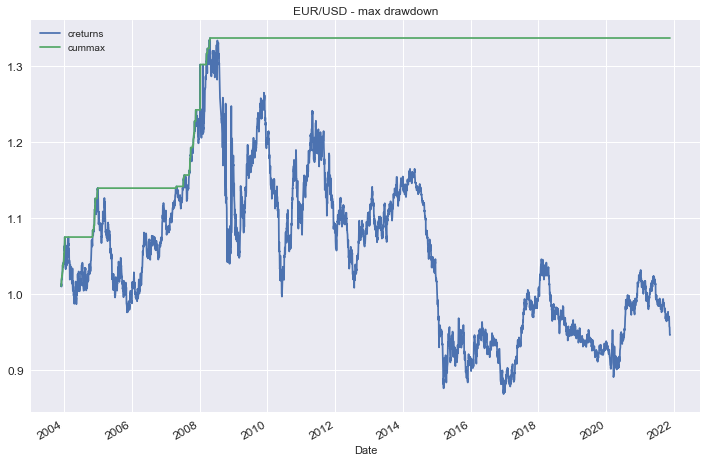

In [42]:
data[['creturns', 'cummax']].dropna().plot(figsize=(12, 8), title="EUR/USD - max drawdown", fontsize = 12)
plt.show()

In [43]:
drawdown = data['cummax'] - data['creturns']
drawdown.max()

0.46782264507624516

In [44]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')